In [1]:
#Data loading from CMATERdb dataset#

from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES=True
tr_d=ImageDataGenerator(rescale=1./255, shear_range=.2, rotation_range=25)
te_d=ImageDataGenerator(rescale=1./255)

train=tr_d.flow_from_directory('Dataset/Train', target_size=(40, 40), batch_size=32, class_mode='categorical')
test=te_d.flow_from_directory('Dataset/Test', target_size=(40, 40), batch_size=32, class_mode='categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [2]:
#CNN Model Declearation#

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout

classifier=Sequential()

classifier.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

#classifier.add(Dense(units=64, activation='relu'))
#classifier.add(Dropout(.2))

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units=50, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
#Training of the dataset#
import math
from math import ceil

BATCH_SIZE=32

TRAINING_SIZE = 12000

VALIDATION_SIZE = 3000 

# Creating a small function for computing step_per_epoch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch1 = compute_steps_per_epoch(TRAINING_SIZE) #Training size epoc determination
val_steps1 = compute_steps_per_epoch(VALIDATION_SIZE) #Testing size epoc determination

history=classifier.fit(train, steps_per_epoch=steps_per_epoch1, epochs=150, validation_data=test, validation_steps=val_steps1)

Epoch 1/150
375/375 [==============================] - 24s 61ms/step - loss: 3.4852 - accuracy: 0.1072 - val_loss: 2.0877 - val_accuracy: 0.4283
Epoch 2/150
375/375 [==============================] - 25s 65ms/step - loss: 1.9132 - accuracy: 0.4558 - val_loss: 1.1821 - val_accuracy: 0.6520
Epoch 3/150
375/375 [==============================] - 24s 65ms/step - loss: 1.4104 - accuracy: 0.5882 - val_loss: 0.7828 - val_accuracy: 0.7687
Epoch 4/150
375/375 [==============================] - 25s 65ms/step - loss: 1.1531 - accuracy: 0.6576 - val_loss: 0.6373 - val_accuracy: 0.8190
Epoch 5/150
375/375 [==============================] - 25s 66ms/step - loss: 1.0353 - accuracy: 0.6948 - val_loss: 0.5396 - val_accuracy: 0.8440
Epoch 6/150
375/375 [==============================] - 25s 67ms/step - loss: 0.9396 - accuracy: 0.7184 - val_loss: 0.5375 - val_accuracy: 0.8387
Epoch 7/150
375/375 [==============================] - 25s 68ms/step - loss: 0.8673 - accuracy: 0.7347 - val_loss: 0.4782 - val_ac

375/375 [==============================] - 25s 65ms/step - loss: 0.3807 - accuracy: 0.8773 - val_loss: 0.2394 - val_accuracy: 0.9313
Epoch 58/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3850 - accuracy: 0.8783 - val_loss: 0.2441 - val_accuracy: 0.9230
Epoch 59/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3769 - accuracy: 0.8771 - val_loss: 0.2460 - val_accuracy: 0.9243
Epoch 60/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3902 - accuracy: 0.8727 - val_loss: 0.2511 - val_accuracy: 0.9257
Epoch 61/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3741 - accuracy: 0.8765 - val_loss: 0.2407 - val_accuracy: 0.9297
Epoch 62/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3650 - accuracy: 0.8823 - val_loss: 0.2412 - val_accuracy: 0.9307
Epoch 63/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3801 - accuracy: 0.8777 - val_loss: 0.2451 - val_accuracy

375/375 [==============================] - 25s 66ms/step - loss: 0.3257 - accuracy: 0.8935 - val_loss: 0.2442 - val_accuracy: 0.9253
Epoch 114/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3065 - accuracy: 0.8961 - val_loss: 0.2403 - val_accuracy: 0.9340
Epoch 115/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3230 - accuracy: 0.8936 - val_loss: 0.2130 - val_accuracy: 0.9413
Epoch 116/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3078 - accuracy: 0.8973 - val_loss: 0.2302 - val_accuracy: 0.9313
Epoch 117/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3137 - accuracy: 0.8963 - val_loss: 0.2349 - val_accuracy: 0.9310
Epoch 118/150
375/375 [==============================] - 25s 66ms/step - loss: 0.3242 - accuracy: 0.8936 - val_loss: 0.2312 - val_accuracy: 0.9313
Epoch 119/150
375/375 [==============================] - 25s 67ms/step - loss: 0.3155 - accuracy: 0.9000 - val_loss: 0.2451 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


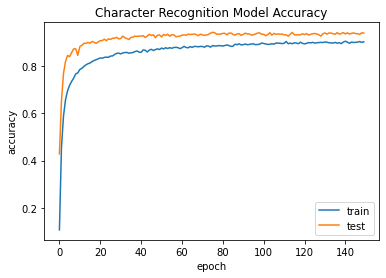

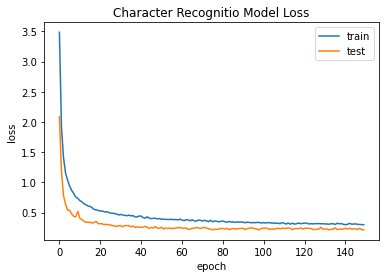

In [8]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Character Recognition Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Character Recognitio Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [10]:
classifier_json=classifier.to_json()

with open("bangla_character_recognition.json","w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("bangla_character_recognition.h5")
print('save model to the disk')

save model to the disk
